# Debugging

Yey - I think I figured it out now :)

**Next Q:** Were  my 4b + 3b1l limits fucked from this?

In [1]:
import matplotlib.pyplot as plt
import json
from itertools import product
import pandas as pd
import numpy as np
import uproot 

import os
os.sys.path.append('../non-resonant-studies/')
os.sys.path.append('../stats-results/')
from quad45_2x2 import res_bin_edges
from utils import lumi as L

%load_ext autoreload
%autoreload 2

Using uproot4


In [5]:
# bStr = '275 289 303 318 334 351 369 387 406 427 448 470 494 519 544 572 600 630 662 695 730 766 804 845 887 931 978 1027 1078'

e = [0, 302.0, 327.0, 353.0, 381.0, 411.0, 444.0, 480.0, 518.0, 560.0, 
     604.0, 653.0, 705.0, 761.0, 822.0, 888.0, np.inf]

In [6]:
nbins = len(e) - 1

In [7]:
nbins

16

In [27]:
cols = ['s','b','stat','Q1','Q2','Q3','Q4']
cols_all = [f'{b} {h}'  for h,b in product(cols,['4b', '3b1l'])]

df = pd.DataFrame(0,index=range(nbins*4*3),columns=cols_all)

df_4b = pd.DataFrame(0,index=range(nbins*4*3),columns=cols)
df_3b1l = pd.DataFrame(0,index=range(nbins*4*3),columns=cols)

In [6]:
ws_name = '../stats-results/Q45/ws-4b-3b1l-systs-m_h1cut-124.0-m_h2cut-117.0-dEta_hh-cat-16-17-18-SM-HH-res_p08_2_Xhh_2_deta_hh_uncorr.json'

In [55]:
ws_4b_name = '../stats-results/Q45/ws-4b-systs-m_h1cut-124.0-m_h2cut-117.0-dEta_hh-cat-16-17-18-SM-HH-res_p08_2_Xhh_2_deta_hh_uncorr.json'
ws_3b1l_name = '../stats-results/Q45/ws-3b1l-systs-m_h1cut-124.0-m_h2cut-117.0-dEta_hh-cat-16-17-18-SM-HH-res_p08_2_Xhh_2_deta_hh_uncorr.json'

In [56]:
with open(ws_name) as f:
    ws = json.load(f)
    
    
with open(ws_4b_name) as f:
    ws_4b = json.load(f)
with open(ws_3b1l_name) as f:
    ws_3b1l = json.load(f)
    

In [57]:
i_3b = 0
i_4b = 0

for i, chan in enumerate(ws['channels']):
    
    print(chan['name'])
    
    name    = chan['name']
    samples = chan['samples']

    if '4b' in name:
        bcat = '4b'
        
        start, stop = i_4b, i_4b + nbins - 1
        i_4b += nbins
        
    else:
        bcat = '3b1l'
    
        start, stop = i_3b, i_3b + nbins - 1
        i_3b += nbins
    
    
    df.loc[start:stop,f'{bcat} s'] = samples[0]['data']
    df.loc[start:stop,f'{bcat} b'] = samples[1]['data']

    df.loc[start:stop,f'{bcat} stat'] = samples[1]['modifiers'][0]['data']
    df.loc[start:stop,f'{bcat} Q1'] = samples[1]['modifiers'][1]['data']['hi_data']
    df.loc[start:stop,f'{bcat} Q2'] = samples[1]['modifiers'][2]['data']['hi_data']
    df.loc[start:stop,f'{bcat} Q3'] = samples[1]['modifiers'][3]['data']['hi_data']
    df.loc[start:stop,f'{bcat} Q4'] = samples[1]['modifiers'][4]['data']['hi_data']
    

channel16cat_4b_0_Xhh-0.0-0.95
channel16cat_4b_0_Xhh-0.95-1.6
channel16cat_4b_1_Xhh-0.0-0.95
channel16cat_4b_1_Xhh-0.95-1.6
channel16cat_3b1l_0_Xhh-0.0-0.95
channel16cat_3b1l_0_Xhh-0.95-1.6
channel16cat_3b1l_1_Xhh-0.0-0.95
channel16cat_3b1l_1_Xhh-0.95-1.6
channel17cat_4b_0_Xhh-0.0-0.95
channel17cat_4b_0_Xhh-0.95-1.6
channel17cat_4b_1_Xhh-0.0-0.95
channel17cat_4b_1_Xhh-0.95-1.6
channel17cat_3b1l_0_Xhh-0.0-0.95
channel17cat_3b1l_0_Xhh-0.95-1.6
channel17cat_3b1l_1_Xhh-0.0-0.95
channel17cat_3b1l_1_Xhh-0.95-1.6
channel18cat_4b_0_Xhh-0.0-0.95
channel18cat_4b_0_Xhh-0.95-1.6
channel18cat_4b_1_Xhh-0.0-0.95
channel18cat_4b_1_Xhh-0.95-1.6
channel18cat_3b1l_0_Xhh-0.0-0.95
channel18cat_3b1l_0_Xhh-0.95-1.6
channel18cat_3b1l_1_Xhh-0.0-0.95
channel18cat_3b1l_1_Xhh-0.95-1.6


In [58]:
len(ws_4b['channels']), len(ws_3b1l['channels'])

(12, 12)

In [76]:
for i, (c_4b,c_3b1l) in enumerate(zip(ws_4b['channels'], ws_3b1l['channels'])):
    
    print(c_4b['name'],c_3b1l['name'])
    
    samp_4b   = c_4b['samples']
    samp_3b1l = c_3b1l['samples']

    start, stop = i*nbins, (i + 1)* nbins - 1
    
    df_4b.loc[start:stop,'s'] = samp_4b[0]['data']
    df_4b.loc[start:stop,'b'] = samp_4b[1]['data']

    df_4b.loc[start:stop,'stat'] = samp_4b[1]['modifiers'][0]['data']

    df_4b.loc[start:stop,'Q1_lo'] = samp_4b[1]['modifiers'][1]['data']['lo_data']
    df_4b.loc[start:stop,'Q2_lo'] = samp_4b[1]['modifiers'][2]['data']['lo_data']
    df_4b.loc[start:stop,'Q3_lo'] = samp_4b[1]['modifiers'][3]['data']['lo_data']
    df_4b.loc[start:stop,'Q4_lo'] = samp_4b[1]['modifiers'][4]['data']['lo_data']
    
    df_4b.loc[start:stop,'Q1_hi'] = samp_4b[1]['modifiers'][1]['data']['hi_data']
    df_4b.loc[start:stop,'Q2_hi'] = samp_4b[1]['modifiers'][2]['data']['hi_data']
    df_4b.loc[start:stop,'Q3_hi'] = samp_4b[1]['modifiers'][3]['data']['hi_data']
    df_4b.loc[start:stop,'Q4_hi'] = samp_4b[1]['modifiers'][4]['data']['hi_data']
    
    df_3b1l.loc[start:stop,'s'] = samp_3b1l[0]['data']
    df_3b1l.loc[start:stop,'b'] = samp_3b1l[1]['data']

    df_3b1l.loc[start:stop,'stat'] = samp_3b1l[1]['modifiers'][0]['data']
    
    df_3b1l.loc[start:stop,'Q1_lo'] = samp_3b1l[1]['modifiers'][1]['data']['lo_data']
    df_3b1l.loc[start:stop,'Q2_lo'] = samp_3b1l[1]['modifiers'][2]['data']['lo_data']
    df_3b1l.loc[start:stop,'Q3_lo'] = samp_3b1l[1]['modifiers'][3]['data']['lo_data']
    df_3b1l.loc[start:stop,'Q4_lo'] = samp_3b1l[1]['modifiers'][4]['data']['lo_data']
    
    df_3b1l.loc[start:stop,'Q1_hi'] = samp_3b1l[1]['modifiers'][1]['data']['hi_data']
    df_3b1l.loc[start:stop,'Q2_hi'] = samp_3b1l[1]['modifiers'][2]['data']['hi_data']
    df_3b1l.loc[start:stop,'Q3_hi'] = samp_3b1l[1]['modifiers'][3]['data']['hi_data']
    df_3b1l.loc[start:stop,'Q4_hi'] = samp_3b1l[1]['modifiers'][4]['data']['hi_data']
    
    


channel16cat_4b_0_Xhh-0.0-0.95 channel16cat_3b1l_0_Xhh-0.0-0.95
channel16cat_4b_0_Xhh-0.95-1.6 channel16cat_3b1l_0_Xhh-0.95-1.6
channel16cat_4b_1_Xhh-0.0-0.95 channel16cat_3b1l_1_Xhh-0.0-0.95
channel16cat_4b_1_Xhh-0.95-1.6 channel16cat_3b1l_1_Xhh-0.95-1.6
channel17cat_4b_0_Xhh-0.0-0.95 channel17cat_3b1l_0_Xhh-0.0-0.95
channel17cat_4b_0_Xhh-0.95-1.6 channel17cat_3b1l_0_Xhh-0.95-1.6
channel17cat_4b_1_Xhh-0.0-0.95 channel17cat_3b1l_1_Xhh-0.0-0.95
channel17cat_4b_1_Xhh-0.95-1.6 channel17cat_3b1l_1_Xhh-0.95-1.6
channel18cat_4b_0_Xhh-0.0-0.95 channel18cat_3b1l_0_Xhh-0.0-0.95
channel18cat_4b_0_Xhh-0.95-1.6 channel18cat_3b1l_0_Xhh-0.95-1.6
channel18cat_4b_1_Xhh-0.0-0.95 channel18cat_3b1l_1_Xhh-0.0-0.95
channel18cat_4b_1_Xhh-0.95-1.6 channel18cat_3b1l_1_Xhh-0.95-1.6


In [60]:
samp_3b1l[0]['data'],samp_3b1l[1]['data']

([0.00034286547,
  0.006316623,
  0.025135573,
  0.045075864,
  0.07781709,
  0.08617273,
  0.105509624,
  0.10688913,
  0.07036105,
  0.063652754,
  0.04932195,
  0.040125012,
  0.023092091,
  0.016598463,
  0.017439842,
  0.023754656],
 [36.594600213282305,
  119.76125358698201,
  231.6227016858614,
  343.56224136546535,
  367.0791945043366,
  325.0971664610099,
  286.351483775006,
  212.41091690217485,
  160.3765111166109,
  120.42018791555256,
  87.76754421082438,
  69.03908558356363,
  49.12417713992522,
  31.231239700070773,
  23.419485145227554,
  34.32150451195355])

In [61]:
df_4b

s          b      stat         Q1         Q2         Q3         Q4
0    0.001468  14.615021  1.487347  14.504382  14.149605  14.599432  14.498826
1    0.012891  54.254398  2.829369  54.288840  53.417152  53.985969  54.013871
2    0.063857  91.404016  5.883679  91.896447  91.777112  92.897433  92.928632
3    0.149714  92.636985  3.492292  93.940943  92.699087  94.233093  94.666780
4    0.217441  79.577423  3.349346  80.829246  79.426795  80.351610  80.399135
..        ...        ...       ...        ...        ...        ...        ...
187  0.133102  69.149642  3.244146  68.580215  68.884465  69.087132  69.042481
188  0.101779  48.869169  2.730947  49.233297  48.943948  48.852942  48.468792
189  0.071580  33.267238  2.260959  33.635826  33.386358  33.343774  33.279102
190  0.056852  20.452982  1.572023  20.499261  20.723455  20.464738  20.299174
191  0.079130  28.963871  2.206014  29.094586  29.092692  28.631654  28.766542

[192 rows x 7 columns]

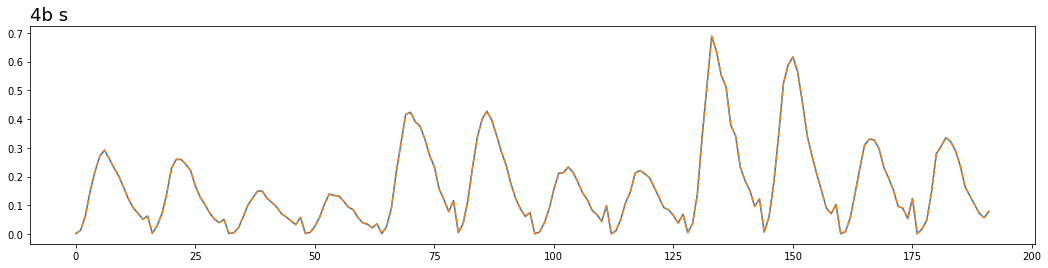

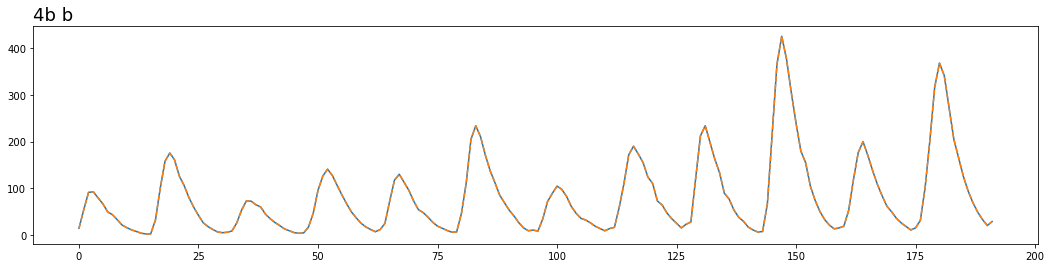

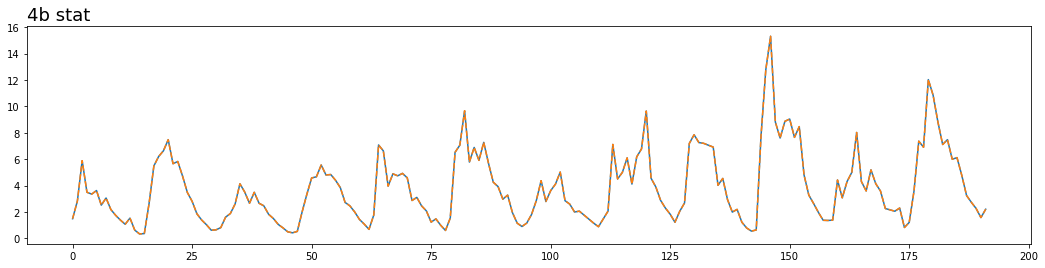

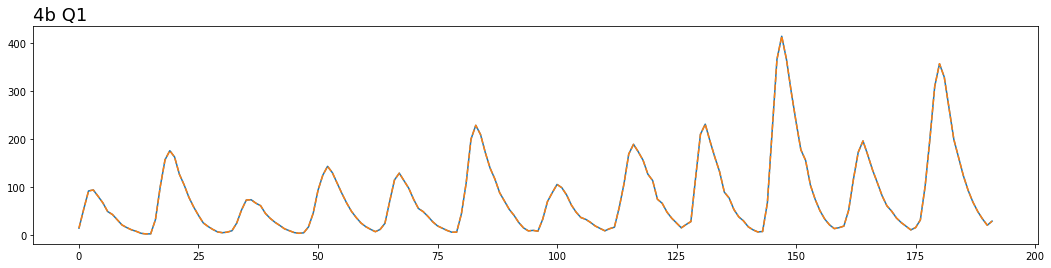

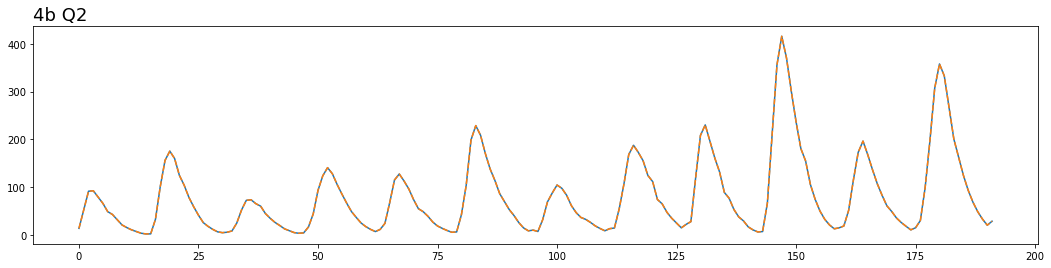

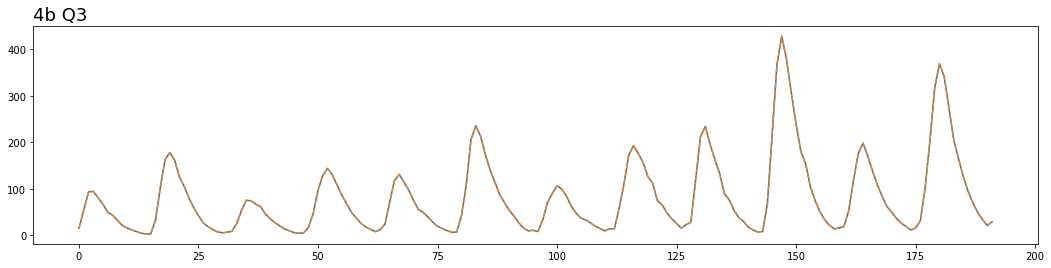

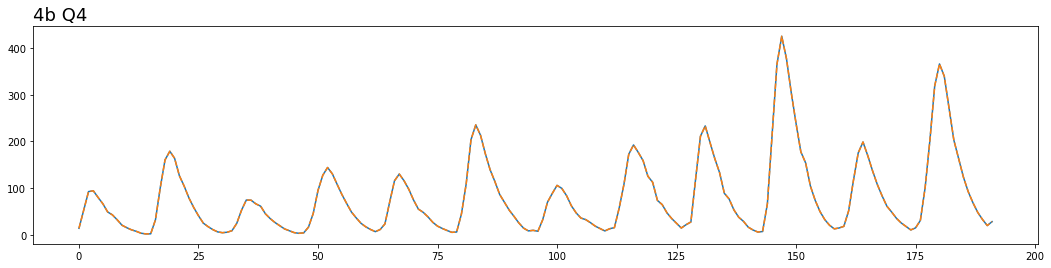

In [62]:
bcat = '4b'

for c in cols:
    
    plt.figure(figsize=(18,4))
    plt.plot(df[f'{bcat} {c}'])
    plt.plot(df_4b[c],ls='--')
    plt.title(f'{bcat} {c}',loc='left',fontsize=18)

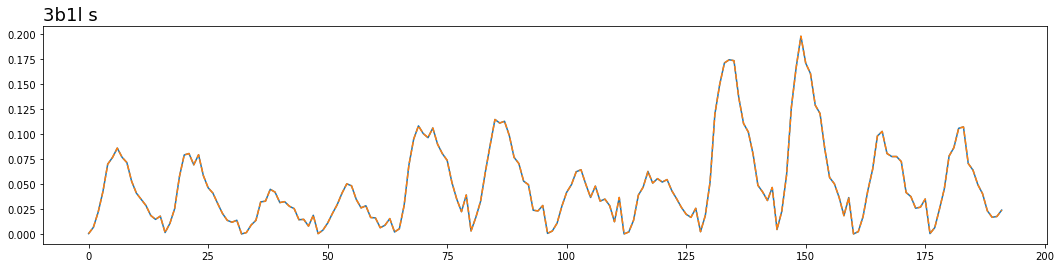

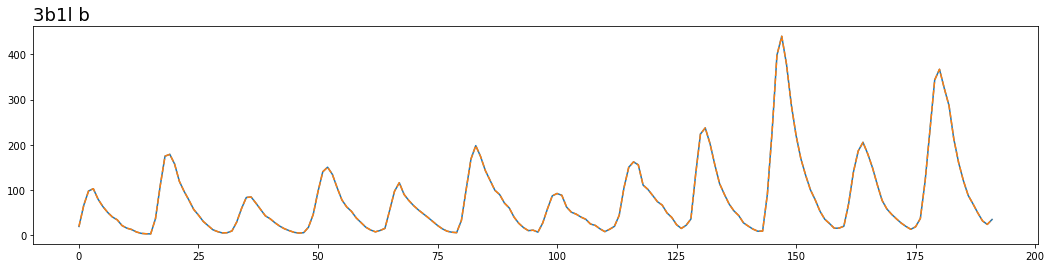

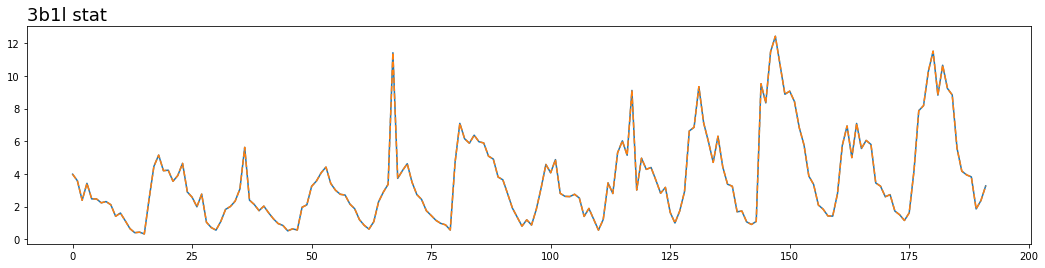

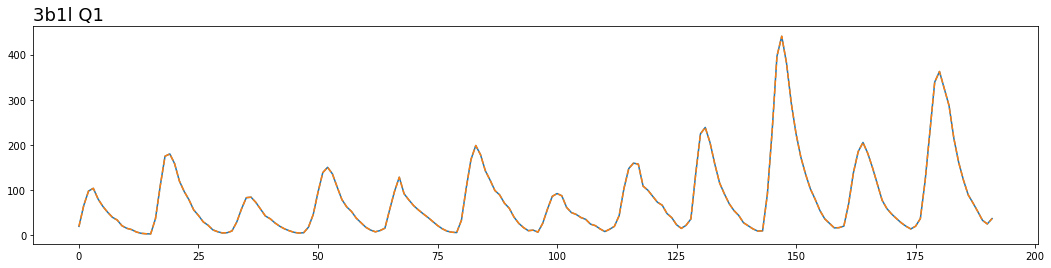

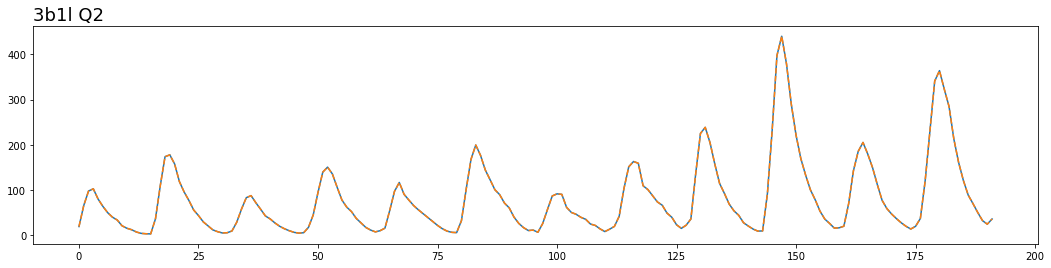

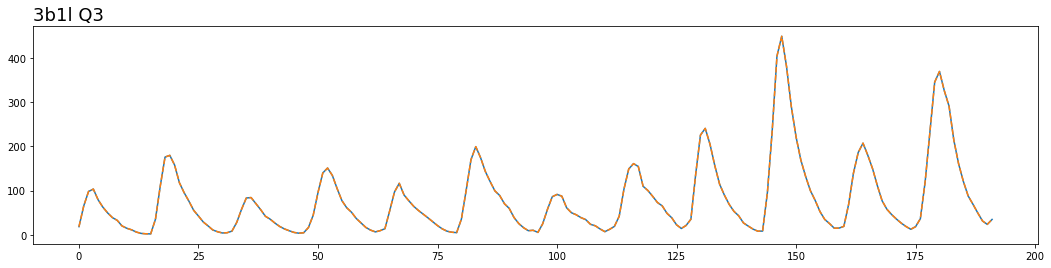

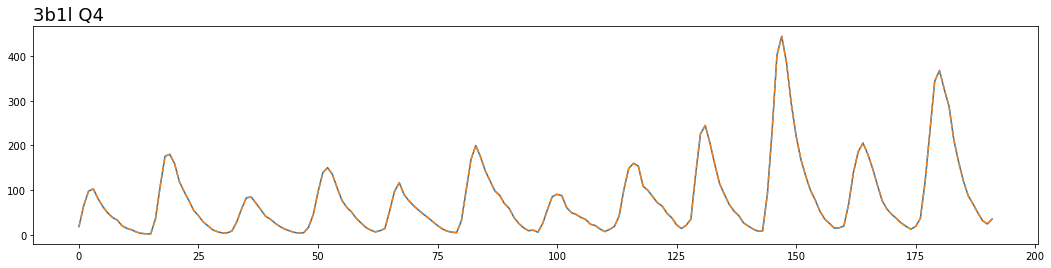

In [63]:
bcat = '3b1l'

for c in cols:
    
    plt.figure(figsize=(18,4))
    plt.plot(df[f'{bcat} {c}'])
    plt.plot(df_3b1l[c],ls='--')
    plt.title(f'{bcat} {c}',loc='left',fontsize=18)

In [64]:
df['4b z'] = df['4b s'] / np.sqrt(df['4b b'])
df['3b1l z'] = df['3b1l s'] / np.sqrt(df['3b1l b'])

In [67]:
z_4b = np.sqrt(np.sum(df['4b z']**2))
z_4b

0.36057825175562597

In [68]:
z_3b1l = np.sqrt(np.sum(df['3b1l z']**2)) 
z_3b1l

0.10784397310871592

In [70]:
np.sqrt(z_4b**2 + z_3b1l**2) / z_4b

1.043768434595424

Ok - so I should expect the limit to be 5% better (based on the histograms)

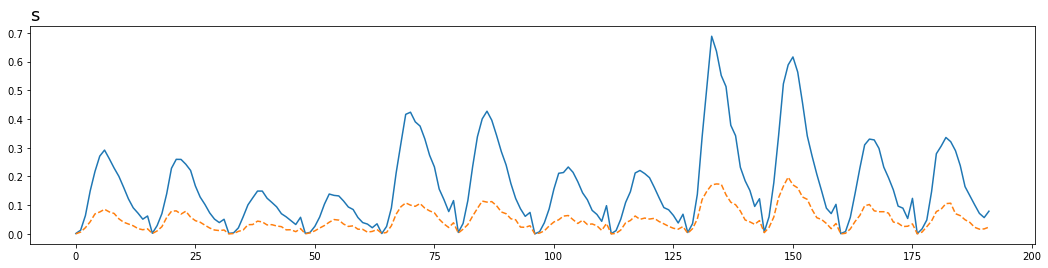

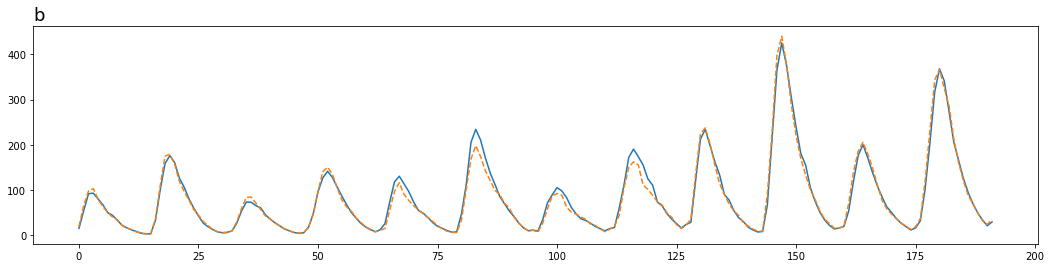

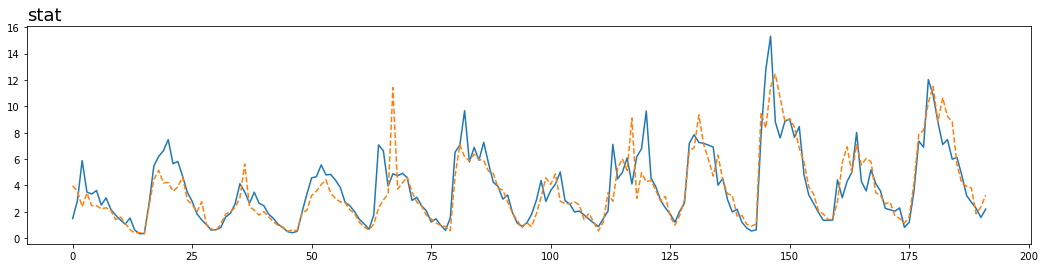

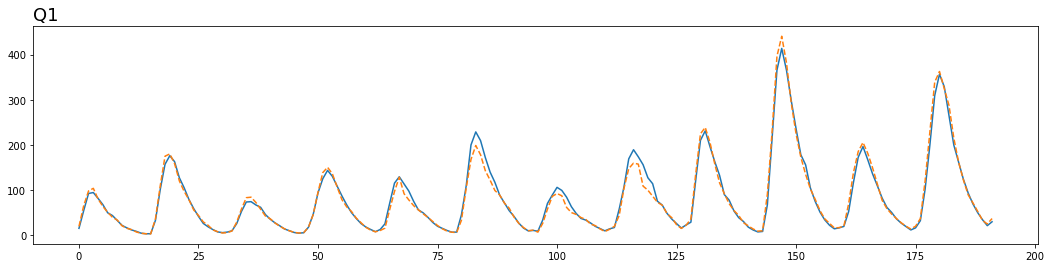

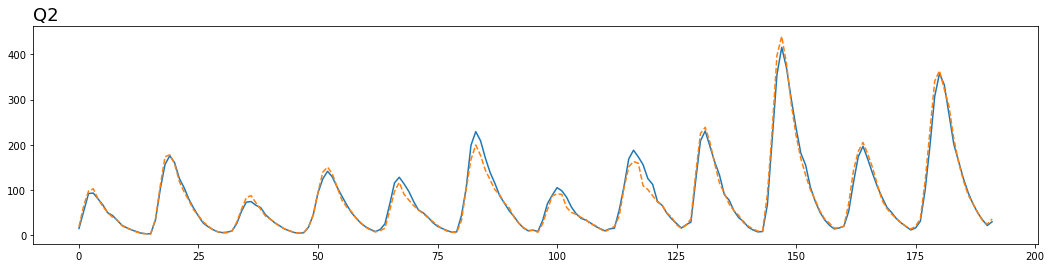

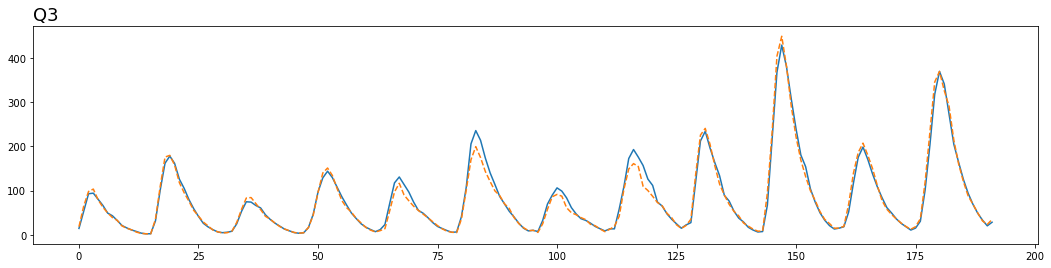

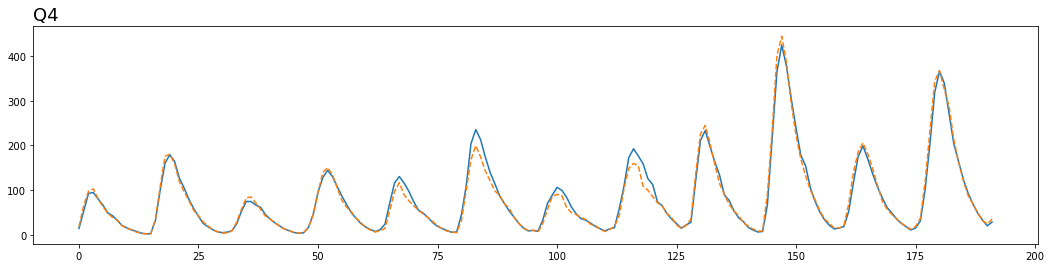

In [72]:
for c in cols:
    
    plt.figure(figsize=(18,4))
    plt.plot(df_4b[c])
    plt.plot(df_3b1l[c],ls='--')
    plt.title(c,loc='left',fontsize=18)

In [74]:
1/np.sqrt(1/6.14**2 + 1/21.42**2)

5.902299099605105

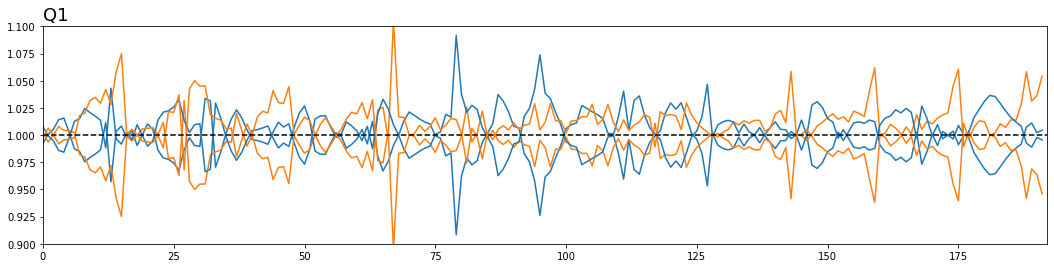

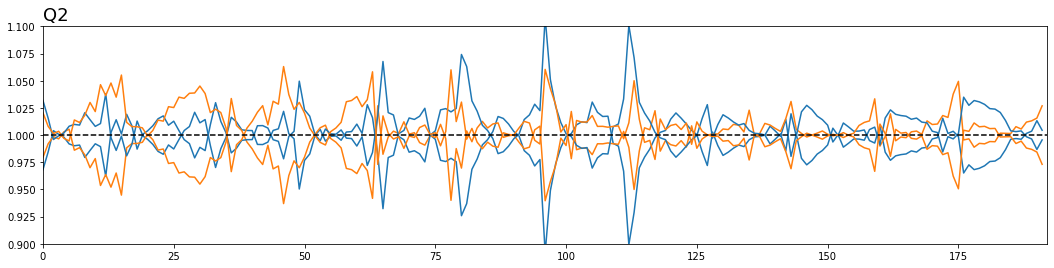

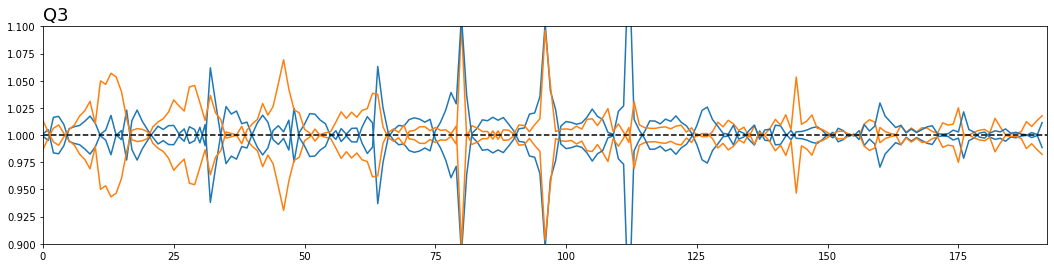

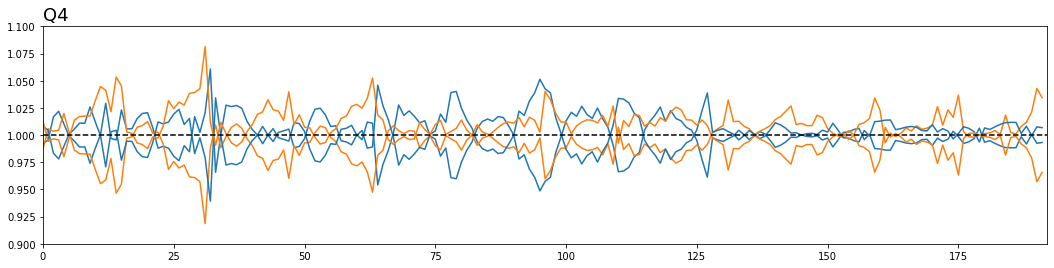

In [82]:
for c in cols[3:]:
    
    plt.figure(figsize=(18,4))
    plt.plot(df_4b[f'{c}_hi']/df_4b['b'],color='C0')
    plt.plot(df_3b1l[f'{c}_hi']/df_3b1l['b'],color='C1')
    
    plt.plot(df_4b[f'{c}_lo']/df_4b['b'],color='C0') #,ls='--')
    plt.plot(df_3b1l[f'{c}_lo']/df_3b1l['b'],color='C1') #,ls='--')
    

    plt.plot([0,nbins*3*4],[1]*2,'k--')
    plt.xlim(0,nbins*3*4)
    plt.ylim(.9,1.1)
    plt.title(c,loc='left',fontsize=18)

In [87]:
np.sqrt(z_3b1l**2 + z_4b**2)/z_4b

1.043768434595424

### Post-fit signal

In [2]:
import pyhf
from pull_imp_utils import *


In [7]:
ws_in = json.load(open(ws_name))
ws = pyhf.Workspace(ws_in)


In [8]:
os.sys.path.append('../pyhf-4b-timing/')

In [9]:
from test_limits import mu_finder, probit, quick_bands

In [10]:
# Step 2: Define the pyhf model and (Aimov - B only) dataset
m = ws.model( measurement_name="Measurement",
              modifier_settings={
                    "normsys": {"interpcode": "code4"},
                    "histosys": {"interpcode": "code4p"},
                },
            )
d = ws.data(m)



In [11]:
find = mu_finder(m,d,'pytorch')

Running with pytorch with 64b precision


In [12]:
lims = find.run_scan()

Initial guess for bands (mu guess = 1.00):
[ 3.14181634  4.21789437  5.85478319  8.14661698 10.92111687]
Beginning optimization, mu valid to 0.01
Finding med_mu for alpha = 0.05
obs tensor(0.2946)
Param: 2, mu: 3.142, CLs: 0.295
obs tensor(0.0003)
Param: 2, mu: 10.921, CLs: 0.000
obs tensor(0.0015)
Param: 2, mu: 9.608, CLs: 0.002
obs tensor(0.0344)
Param: 2, mu: 6.375, CLs: 0.034
obs tensor(0.0925)
Param: 2, mu: 5.059, CLs: 0.092
obs tensor(0.0456)
Param: 2, mu: 6.021, CLs: 0.046
obs tensor(0.0503)
Param: 2, mu: 5.894, CLs: 0.050
obs tensor(0.0500)
Param: 2, mu: 5.901, CLs: 0.050
Param: 2, mu: 3.142, CLs: 0.295
Param: 2, mu: 10.921, CLs: 0.000
Param: 2, mu: 9.608, CLs: 0.002
Param: 2, mu: 6.375, CLs: 0.034
Param: 2, mu: 5.059, CLs: 0.092
Param: 2, mu: 6.021, CLs: 0.046
Param: 2, mu: 5.894, CLs: 0.050
Param: 2, mu: 5.901, CLs: 0.050
Guess for bands with proper med:
[ 3.16679109  4.251423    5.90132368  8.21137559 11.00793037]
Refining bands
Param: 0, mu: 3.008, CLs: 0.059
Param: 0, mu: 

In [13]:
print(f'Running S+B fit')
model, data, bestfit, errors, obj = fitresults(ws,mu_bounds=[-1000,10000], 
                                               return_result_obj=True)



Running S+B fit


In [ ]:
mu = bestfit[model.config.poi_index]
mu_err = errors[model.config.poi_index]

# Also save the the bkg only fit to viz the fitted signal
bf_mueq0 = bestfit.copy()
bf_mueq0[model.config.poi_index] = 0
postfit_back = model.expected_actualdata(bf_mueq0)



### You can stop reading here - Sean :)

**Load in the bkg df**

In [ ]:
yr = 16
mc = 'mc16a'
bcat='4b'

In [ ]:
fDir = '../data/RR/cryptotuples/ggF_rw_pre_Xwt/'

dat_name = f'{fDir}/data{yr}_NN_100_bootstraps.root'

In [17]:
sm_name = '../../hh4b/hh4b-resolved-reconstruction/SMNR_pythia_mc16a.root'

with uproot.open(sm_name) as fs:

    sm = fs['sig'].arrays(library='pd')

In [30]:
sm = sm[0].xs(0, axis = 0, level = 1, drop_level = True)

In [ ]:
[c for c in sm.colu]

In [33]:
m = (sm.X_wt_tag > 1.5) & (~ sm.pass_vbf_sel)  
mi = m & (sm.dEta_hh < 0.75) & (sm.X_hh < .95) & (sm.ntag ==3) & (sm.minQ == 2)

In [41]:
s0 = np.histogram(sm.loc[mi,'m_hh'],e,weights=L[16]*sm.loc[mi,'mc_sf'])[0]

s0

array([0.00029255, 0.00657051, 0.02175069, 0.04234398, 0.06969956,
       0.07638955, 0.08570965, 0.07660475, 0.07129717, 0.05257443,
       0.04070526, 0.03447545, 0.02835137, 0.0184375 , 0.01451254,
       0.01775426], dtype=float32)

In [42]:
df['3b1l s'].values

array([0.00029255, 0.00657051, 0.02175069, 0.04234398, 0.06969956,
       0.07638955, 0.08570965, 0.07660475, 0.07129717, 0.05257443,
       0.04070526, 0.03447545, 0.02835137, 0.0184375 , 0.01451254,
       0.01775426])

In [40]:
df['4b s'].values

array([0.00146759, 0.01289117, 0.06385674, 0.149714  , 0.21744129,
       0.2708311 , 0.29188192, 0.26162064, 0.22942865, 0.20044088,
       0.16200292, 0.12197483, 0.09094024, 0.07229567, 0.05133843,
       0.06239128])

In [ ]:

np.histogram(sm.loc[m,'m_hh'],e,weights=L[16]*sm.loc[m,'mc_sf'])[0]



In [18]:
with uproot.open(f'{dat_name}') as fd:
    
    bl = '' if bcat=='4b' else f'_{bcat}'
    
    norm = fd[f'NN_norm{bl}_bstrap_med_{yr}'].all_members['fVal']
    norm_VR = fd[f'NN_norm{bl}_bstrap_med_{yr}'].all_members['fVal']
    norm_IQR = fd[f'NN_norm{bl}_bstrap_IQR_{yr}'].all_members['fVal']
    
    sr = fd['sig'].arrays(library='pd')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/u/ki/nhartman/gpfs/miniconda3/envs/my_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-97a10c16607c>", line 9, in <module>
    sr = fd['sig'].arrays(library='pd')
  File "/u/ki/nhartman/.local/lib/python3.8/site-packages/uproot/behaviors/TBranch.py", line 1124, in arrays
    _ranges_or_baskets_to_arrays(
  File "/u/ki/nhartman/.local/lib/python3.8/site-packages/uproot/behaviors/TBranch.py", line 3376, in _ranges_or_baskets_to_arrays
    hasbranches._file.source.chunks(ranges, notifications=notifications)
  File "/u/ki/nhartman/.local/lib/python3.8/site-packages/uproot/source/file.py", line 158, in chunks
    data = numpy.array(self._file[start:stop], copy=True)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/u/ki/nhartman/gpfs/miniconda3/env

TypeError: object of type 'NoneType' has no len()

In [ ]:
bStr

In [ ]:
e = [0, 289, 303, 318, 334, 351, 369, 387, 406, 427, 448, 470, 494, 
     519, 544, 572, 600, 630, 662, 695, 730, 766, 804, 845, 887, 
     931, 978, 1027, np.inf]

In [ ]:
for c in sr.columns:
    print(c)

In [ ]:
m = sr.rw_to_4b & (sr.X_wt_tag > 1.5)
b = np.histogram(sr.loc[m,'m_hh'],e,
                 weights=norm*sr.loc[m,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])[0]

In [ ]:
b

In [ ]:
df['b_old'].values

In [ ]:
bp = np.histogram(sr.loc[m,'m_hh'],e,
                  weights=norm*sr.loc[m,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])[0]
bp

In [ ]:
from utils import systs

In [ ]:
# arr = df

# pT_cols = ['pT_h1_j1','pT_h1_j2','pT_h2_j1','pT_h2_j2']

# arr['HT'] = arr[pT_cols].sum(axis=1)

In [ ]:
b0in = [14.411558015240185,
        54.35653005331031,
        92.19505089365828,
        93.6042448232137,
        80.35637859866478,
        67.92699574707243,
        50.92565802840109,
        45.212420896384316,
        34.26271693551176,
        22.624773763716888,
        16.55164115893774,
        11.459668705839334,
        7.539605530040944,
        3.8498153048183497,
        2.375577835305137,
        2.491796828000986 ]

In [ ]:
from 

In [ ]:
lo, hi, res = 280, 950, .08
e_p08 = res_bin_edges(lo,hi,res=res).astype(float)
e_p08[0] = 0
e_p08[-1] = np.inf

In [ ]:
mi= m & (sr.dEta_hh < 0.75) & (sr.X_hh < 0.95)

out = systs(sr[mi],norm,norm_VR,yr,e_p08,bcat,'m_hh')

In [ ]:
out[0]

In [ ]:
b0in

In [ ]:
bp = np.histogram(sr.loc[mi,'m_hh'],e_p08,
                  weights=norm*sr.loc[mi,f'NN_d24_weight_VRderiv_bstrap_med_{yr}'])[0]
bp


In [ ]:
df['b_new'].values

In [ ]:
out[0]

In [ ]:
b